In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline

In [2]:
accept_df = pd.read_csv("accepted_2007_to_2018Q4.csv")
pd.options.mode.chained_assignment = None
pd.set_option("display.max_column", None)
accept_df.head()

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

Creating a new DataFrame using Description column for TF-IDF.

In [3]:
desc_df = accept_df[['desc']]
pd.options.mode.chained_assignment = None

In [4]:
desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 1 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   desc    object
dtypes: object(1)
memory usage: 17.2+ MB


In [5]:
desc_df.dropna(inplace=True)

In [6]:
desc_df['desc'].head()

1480     We knew that using our credit cards to finance...
33065    I had a bad year two years ago, with some late...
37860    Lenders,  I have the ability to pay off my cur...
50494     I paid off my first Prosper loan, but had an ...
61258                                                     
Name: desc, dtype: object

In [7]:
desc_df.to_csv('description.csv', index=False)

Here we made a new CSV file for our description feature.

### Exploratory Data Analysis

In [8]:
accept_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

Here we can look at loan_status feature for refrence to predict the result

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


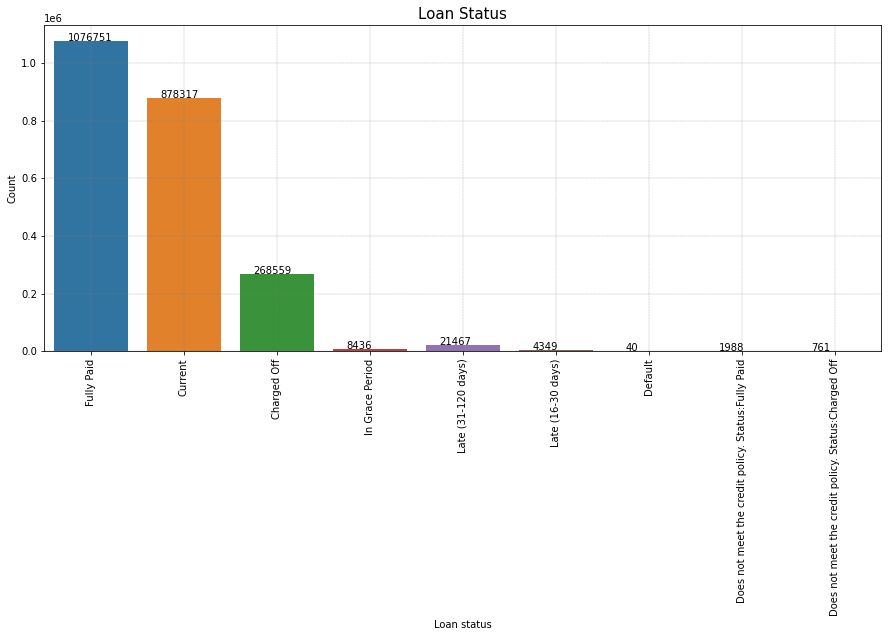

In [9]:
fig = plt.figure(figsize=(15,6))
axes = fig.add_subplot(111)
s = sns.countplot('loan_status', data = accept_df)
for s in axes.patches:
    axes.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.grid(color='gray', linestyle='--', linewidth=0.3)
plt.title("Loan Status", fontsize=15)
plt.xlabel('Loan status', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=90)
plt.show()

<ul>
    <li>Here We can see that 50% laon are fully paid</li>
    <li>Almost 10%-15% Loan amount was not returned or was late</li>

In [10]:
accept_df['loan_status'].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

We will include rows having  Fully paid and Charged Off category in loan_status.

In [11]:
accept_df = accept_df.loc[accept_df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [12]:
accept_df.shape

(1345310, 151)

In [13]:
accept_df['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.800374
Charged Off    0.199626
Name: loan_status, dtype: float64

About 80% of the remaining loans have been fully paid and 20% have charged off, so we have a somewhat unbalanced classification problem.

In [14]:
accept_df['loan_status'] = accept_df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [15]:
accept_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.344936e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345309e+06,666567.000000,228555.000000,1.345310e+06,1.345310e+06,1.345310e+06,1.344453e+06,1.345310e+06,1345310.0,1345310.0,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345310e+06,1.345254e+06,353750.000000,1345310.0,2.580000e+04,25797.000000,1.345310e+06,1.277783e+06,1.277783e+06,537597.000000,537598.000000,537598.000000,537598.000000,523382.000000,5.375980e+05,465016.000000,537598.000000,537598.000000,537598.000000,537545.000000,1.277783e+06,537598.000000,537597.000000,537597.000000,1.298029e+06,1.277761e+06,1.284167e+06,1.283398e+06,1.345254e+06,1.345310e+06,1.239735e+06,1.277782e+06,1.277782e+06,1.277783e+06,1.298029e+06,1.285089e+06,319020.000000,1.171239e+06,449962.000000,1.277783e+06,1.277783e+06,1.277783e+06,1.289469e+06,1.277783e+06,1.277783e+06,1.277783e+06,1.277782e+06,1.277783e+06,1.289469e+06,1.227909e+06,1.277783e+06,1.277783e+06,1.277783e+06,1.277629e+06,1.283755e+06,1.344613e+06,1.345271e+06,1.277783e+06,1.298029e+06,1.298029e+06,1.277783e+06,18629.000000,18630.000000,18630.000000,18630.000000,18630.000000,18630.000000,18302.000000,18630.000000,18630.000000,18630.000000,18630.000000,6645.000000,5754.0,5754.000000,5754.0,5754.000000,3759.000000,5754.000000,5754.000000,33276.000000,33276.000000,33276.000000
mean,NaN,1.441997e+04,1.441156e+04,1.438914e+04,1.323962e+01,4.380755e+02,7.624764e+04,1.996261e-01,1.828267e+01,3.177944e-01,6.961850e+02,7.001852e+02,6.550807e-01,34.312069,70.637120,1.159352e+01,2.152760e-01,1.624811e+04,5.181002e+01,2.498084e+01,0.0,0.0,1.482386e+04,1.480020e+04,1.218190e+04,2.398946e+03,1.582975e+00,2.414392e+02,4.022990e+01,5.423571e+03,6.772863e+02,6.601628e+02,1.713357e-02,43.701165,1.0,1.173830e+05,18.896631,5.045677e-03,2.493859e+02,1.411338e+05,1.050562,2.792555,0.776366,1.742754,19.592967,3.586201e+04,71.422076,1.420885,3.005071,5537.703496,58.176372,3.279094e+04,1.093306,1.609243,2.312381,4.692870e+00,1.34

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


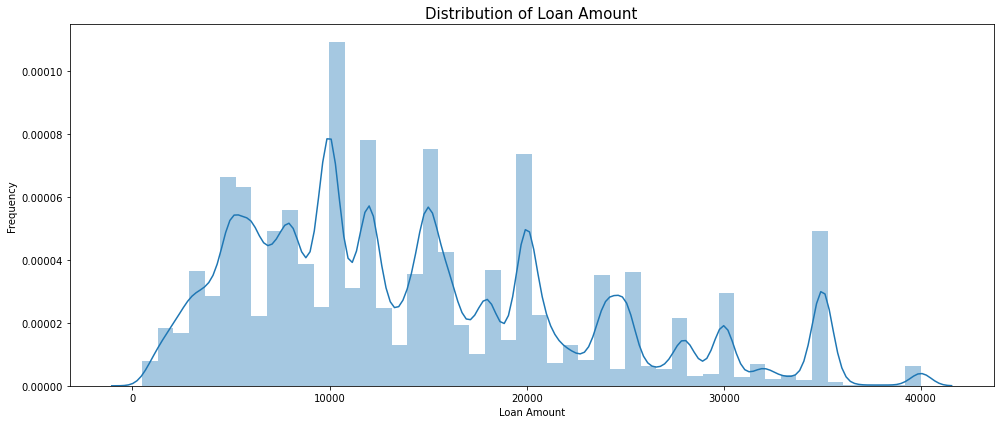

In [16]:
sns.distplot(accept_df['loan_amnt'])
plt.gcf().set_size_inches(14,6)
plt.title('Distribution of Loan Amount', fontsize = 15)
plt.xlabel('Loan Amount', fontsize = 10)
plt.ylabel('Frequency', fontsize=10)
plt.tight_layout()

Distributin of Loan amount is highest around 10k

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


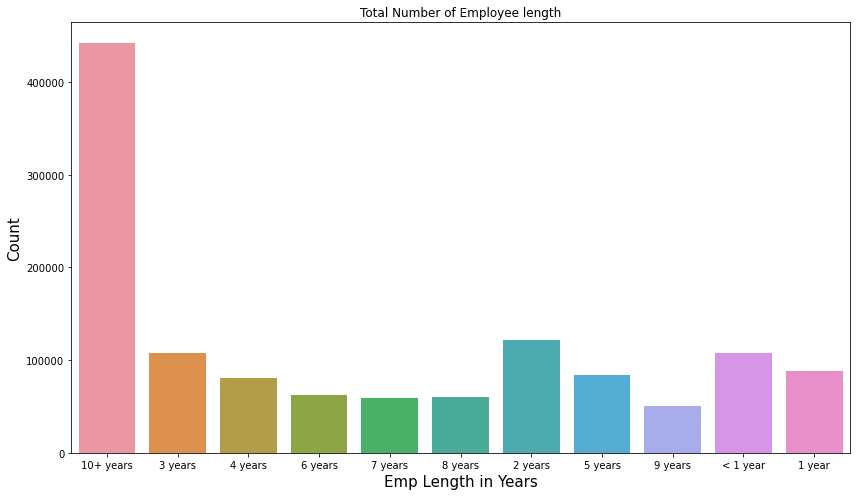

In [17]:
sns.countplot(accept_df['emp_length'])
plt.gcf().set_size_inches(12,7)
plt.xlabel('Emp Length in Years', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Total Number of Employee length')
plt.tight_layout()

We can see that Employee having Experience around 10 year and more are likely have higher chances of getting loan.

Text(0, 0.5, 'Count')

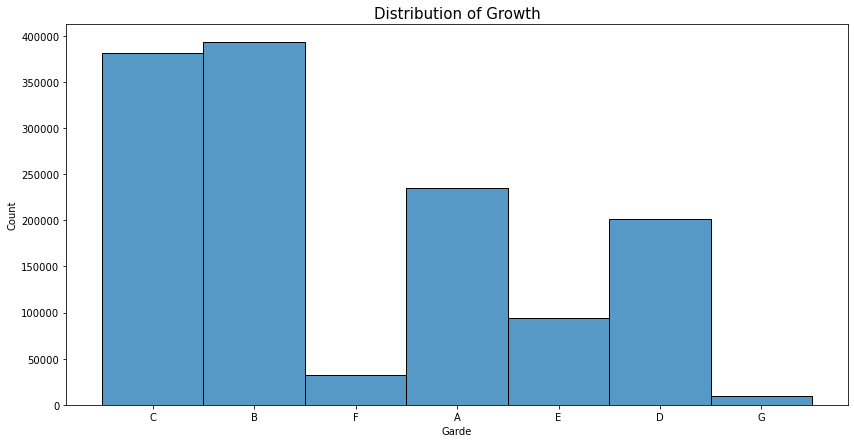

In [18]:
sns.histplot(accept_df['grade'])
plt.gcf().set_size_inches(14,7)
plt.title('Distribution of Growth', fontsize=15)
plt.xlabel('Garde', fontsize=10)
plt.ylabel('Count', fontsize=10)

Here we can see the most loan lies in grade C & B Because they lies in low risk and good interest rate
Risk: There is certain percentage of guarentee that loan will be recoverd the lower the risk better for organization.
<li>For Grade C- Risk:12-15% while Interest:17-20%</li>
<li>For Grade B- Risk:8-11% while Interest:13-16%</li>
Grade A has low risk and low interest 
<li>For Grade A- Risk:3-5% while Interest:8-10%</li>

In [19]:
purp_loan= ['purpose', 'loan_status']
chart = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(accept_df[purp_loan[0]], accept_df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = chart)

loan_status,0,1
purpose,,
car,1.160000,0.800000
credit_card,22.780000,18.610000
debt_consolidation,57.140000,61.440000
educational,0.030000,0.020000
home_improvement,6.690000,5.770000
house,0.530000,0.590000
major_purchase,2.220000,2.040000
medical,1.130000,1.260000
moving,0.670000,0.820000


<li> We can see that almost 50% laon were applied by reason of debt_consolidation</li> 
--Debt consolidation is the act of combining several loans or liabilities into one by taking out a new loan to pay off the debts.

Text(0, 0.5, 'Count')

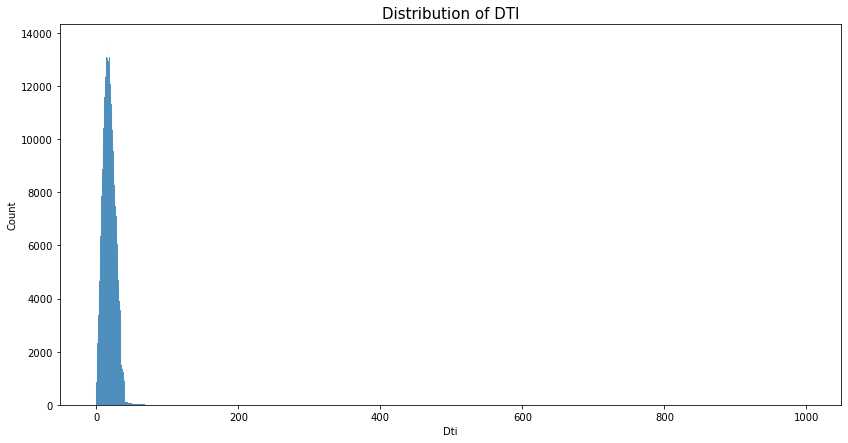

In [20]:
sns.histplot(accept_df['dti'])
plt.gcf().set_size_inches(14,7)
plt.title('Distribution of DTI', fontsize = 15)
plt.xlabel("Dti", fontsize=10)
plt.ylabel("Count", fontsize=10)

Finding missing value in percent

In [21]:
miss_value = accept_df.isnull().mean().sort_values(ascending = False)

In [22]:
miss_value.head(10)

next_pymnt_d                                  1.000000
member_id                                     1.000000
orig_projected_additional_accrued_interest    0.997206
hardship_start_date                           0.995723
hardship_length                               0.995723
hardship_type                                 0.995723
hardship_reason                               0.995723
hardship_status                               0.995723
deferral_term                                 0.995723
hardship_amount                               0.995723
dtype: float64

Text(0, 0.5, 'Feature count')

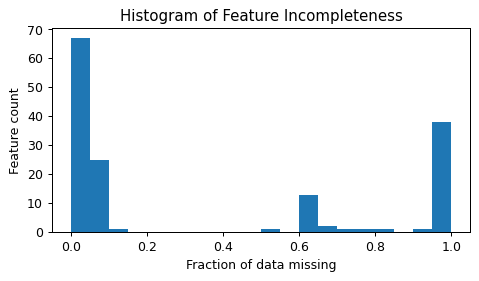

In [23]:
plt.figure(figsize=(6,3), dpi=90)
miss_value.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [24]:
drop_list = sorted(list(miss_value[miss_value > 0.1].index))
print(drop_list)

['all_util', 'annual_inc_joint', 'debt_settlement_flag_date', 'deferral_term', 'desc', 'dti_joint', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'member_id', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'open_rv_12m', 'open_rv_24m', 'orig_projected_additional_accrued_interest', 'payment_plan_start_date', 'revol_bal_joint', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_earliest_cr_line', 'sec_app_fico_range_high', 'sec_app_fico_range_low', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 's

In [25]:
drop_list.remove('open_acc_6m')

In [26]:
len(drop_list)

58

In [27]:
accept_df.drop(labels=drop_list, axis=1, inplace=True)

In [28]:
accept_df.shape

(1345310, 93)

In [29]:
accept_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.0,0.0,22705.924294,22705.92,20000.0,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,0.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.0,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,1.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,68426831,11950.0,11950.0,11950.0,36 months,13.44,405.18,C,C3,Veterinary Tecnician,4 years,RENT,34000.0,Source Verified,Dec-2015,0,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,690.0,694.0,0.0,5.0,0.0,8822.0,

In [30]:
print(sorted(accept_df.columns))

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'delinq_2yrs', 'delinq_amnt', 'disbursement_method', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_flag', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 

We will keep the Features which are required for our Prediction

In [31]:
InterestedFeatures_list = ['addr_state', 'annual_inc', 'application_type', 'chargeoff_within_12_mths', 'dti', 'delinq_2yrs',
                           'earliest_cr_line','emp_length', 'emp_title','fico_range_high', 'fico_range_low', 'grade',
                           'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'last_pymnt_d','loan_amnt',
                           'loan_status', 'mort_acc', 'open_acc', 'open_acc_6m', 'pub_rec','pub_rec_bankruptcies','purpose',
                           'revol_bal', 'revol_util', 'term', 'total_acc', 'tot_cur_bal','verification_status']

In [32]:
len(InterestedFeatures_list)

31

In [33]:
drop_list = [col for col in accept_df.columns if col not in InterestedFeatures_list]
print(drop_list)

['id', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'issue_d', 'pymnt_plan', 'url', 'title', 'zip_code', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_

In [34]:
accept_df.drop(labels=drop_list, axis=1, inplace=True)

In [35]:
accept_df.shape

(1345310, 31)

In [36]:
#Removing rows having all na values if there present any.
accept_df.dropna(axis=0, how='all', inplace=True)

In [37]:
accept_df.shape

(1345310, 31)

In [38]:
#Knowing datatype of Feature
accept_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345310 entries, 0 to 2260697
Data columns (total 31 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   loan_amnt                 1345310 non-null  float64
 1   term                      1345310 non-null  object 
 2   int_rate                  1345310 non-null  float64
 3   installment               1345310 non-null  float64
 4   grade                     1345310 non-null  object 
 5   emp_title                 1259525 non-null  object 
 6   emp_length                1266799 non-null  object 
 7   home_ownership            1345310 non-null  object 
 8   annual_inc                1345310 non-null  float64
 9   verification_status       1345310 non-null  object 
 10  loan_status               1345310 non-null  int64  
 11  purpose                   1345310 non-null  object 
 12  addr_state                1345310 non-null  object 
 13  dti                       1

Handling Missing Values:

In [39]:
num_column = []

In [40]:
for i in accept_df.dtypes.index:
    if accept_df.dtypes[i] == 'float64':
        num_column.append(i)

num_column

['loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'tot_cur_bal',
 'open_acc_6m',
 'chargeoff_within_12_mths',
 'mort_acc',
 'pub_rec_bankruptcies']

We have created a num_column list to store all the float values.

In [41]:
len(num_column)

18

In [42]:
#function to remove nan value using mean()
def impute_nan_num(df, variable):
    df[variable] = df[variable].fillna(df[variable].median())

In [43]:
for i in num_column:
    impute_nan_num(accept_df, i)

In [44]:
obj_column = []

In [45]:
for i in accept_df.dtypes.index:
    if accept_df.dtypes[i] == 'object':
        obj_column.append(i)

print(obj_column)

['term', 'grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'application_type']


In [46]:
#function to remove na value in obj datatype using most frequent method.
def impute_nan_obj(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable] = df[variable].fillna(most_frequent_category)

In [47]:
#iterating through columns
for feature in obj_column:
    impute_nan_obj(accept_df,feature)

In [48]:
accept_df['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year'],
      dtype=object)

We will replace 10+ Years as 10 years, '< 1 year' as 0 year and remove years from all values

In [49]:
accept_df['emp_length'].replace('10+ years', '10', inplace=True)
accept_df['emp_length'].replace('3 years', '3', inplace=True)
accept_df['emp_length'].replace('4 years', '4', inplace=True)
accept_df['emp_length'].replace('6 years', '6', inplace=True)
accept_df['emp_length'].replace('1 year', '1', inplace=True)
accept_df['emp_length'].replace('7 years', '7', inplace=True)
accept_df['emp_length'].replace('8 years', '8', inplace=True)
accept_df['emp_length'].replace('5 years', '5', inplace=True)
accept_df['emp_length'].replace('2 years', '2', inplace=True)
accept_df['emp_length'].replace('9 years', '9', inplace=True)
accept_df['emp_length'].replace('1 year', '1', inplace=True)
accept_df['emp_length'].replace('< 1 year', '0', inplace=True)

In [50]:
accept_df['emp_length'].unique()

array(['10', '3', '4', '6', '7', '8', '2', '5', '9', '0', '1'],
      dtype=object)

We will convert the 'emp_length' from object to float64

In [51]:
accept_df['emp_length'] = accept_df['emp_length'].astype('float64')

In [52]:
accept_df['emp_length'].dtype

dtype('float64')

In [53]:
accept_df['term'].value_counts(dropna=False)

 36 months    1020743
 60 months     324567
Name: term, dtype: int64

In [54]:
accept_df['term'] = accept_df['term'].apply(lambda s: np.int8(s.split()[0]))

In [55]:
accept_df['term'].dtypes

dtype('int64')

In [56]:
accept_df = accept_df.astype({"term":'float64'})

accept_df['term'].dtypes

dtype('float64')

In [57]:
accept_df.corr()['loan_status'].drop('loan_status').sort_values().hvplot.barh()

:Bars   [index]   (loan_status)

##### Loading reject Dataset 

In [58]:
reject_df = pd.read_csv("rejected_2007_to_2018Q4.csv")
pd.options.mode.chained_assignment = None
reject_df.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [59]:
reject_df.shape

(27648741, 9)

In [60]:
reject_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


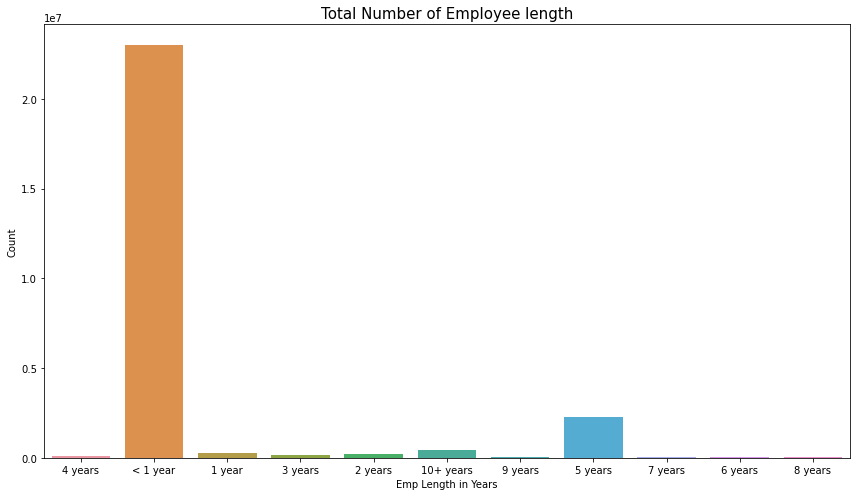

In [61]:
sns.countplot(reject_df['Employment Length'])
plt.gcf().set_size_inches(12,7)
plt.xlabel('Emp Length in Years', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title('Total Number of Employee length', fontsize=15)
plt.tight_layout()

Here we can analyze that people having employment length less than 1 year are rejected highest number of times.

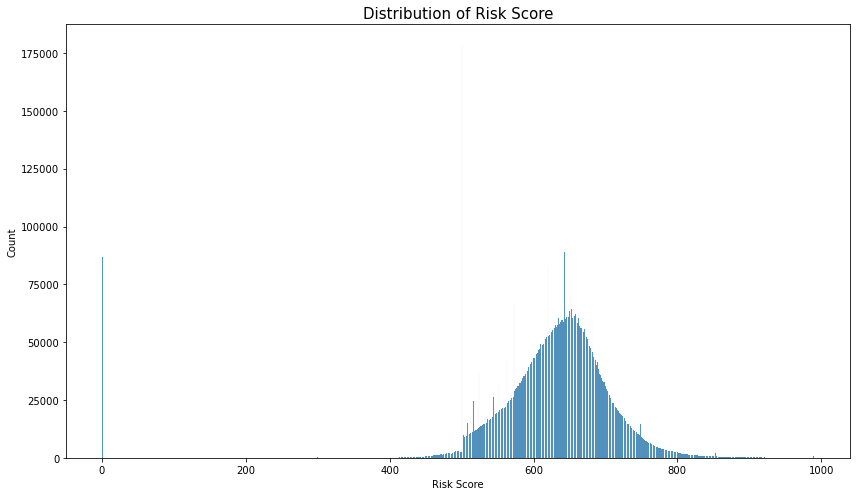

In [63]:
sns.histplot(reject_df['Risk_Score'])
plt.gcf().set_size_inches(12,7)
plt.xlabel('Risk Score', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.title('Distribution of Risk Score', fontsize=15)
plt.tight_layout()

###  Encoding on Categorical Value

In [64]:
cat_col_accept = []

In [65]:
for i in accept_df.dtypes.index:
    if accept_df.dtypes[i] == 'object':
        cat_col_accept.append(i)
        
cat_col_accept

['grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'application_type']

In [66]:
len(cat_col_accept)

10

In [67]:
from sklearn import preprocessing

In [68]:
label_encoder = preprocessing.LabelEncoder()

for col in cat_col_accept:
    accept_df[col] = label_encoder.fit_transform(accept_df[col])

In [69]:
accept_df.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_pymnt_d,application_type,tot_cur_bal,open_acc_6m,chargeoff_within_12_mths,mort_acc,pub_rec_bankruptcies
0,3600.0,36.0,13.99,123.03,2,351502,10.0,1,55000.0,0,0,2,38,5.91,0.0,108,675.0,679.0,7.0,0.0,2765.0,29.7,13.0,1,56,0,144904.0,2.0,0.0,1.0,0.0
1,24700.0,36.0,11.99,820.28,2,102647,10.0,1,65000.0,0,0,11,41,16.06,1.0,165,715.0,719.0,22.0,0.0,21470.0,19.2,38.0,1,76,0,204396.0,1.0,0.0,4.0,0.0
2,20000.0,60.0,10.78,432.66,1,374935,10.0,1,63000.0,0,0,4,14,10.78,0.0,105,695.0,699.0,6.0,0.0,7869.0,56.2,18.0,1,77,1,189699.0,0.0,0.0,5.0,0.0
4,10400.0,60.0,22.45,289.91,5,67587,3.0,1,104433.0,1,0,6,38,25.37,1.0,414,695.0,699.0,12.0,0.0,21929.0,64.5,35.0,1,65,0,331730.0,1.0,0.0,6.0,0.0
5,11950.0,36.0,13.44,405.18,2,316071,4.0,5,34000.0,1,0,2,10,10.20,0.0,650,690.0,694.0,5.0,0.0,8822.0,68.4,6.0,1,100,0,12798.0,0.0,0.0,0.0,0.0


Here We can see that we have successfully applied label encoding on accept_df dataset
We wiil apply to reject_df Database.

### Data Modeling

#### Splitting data into Train & Test

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = accept_df.drop('loan_status', axis =1)
y = accept_df['loan_status']
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=70)

### Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
#Fitting Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [75]:
#Prediction & Accuracy Score
y_pred = dt_model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.705495387680163


In [76]:
#F! Score
f1_score(y_test, y_pred)

0.29103987975234713

In [77]:
np.array((y_pred==y_test)).sum()

284733

In [78]:
#Confusion Matrix
cnf = confusion_matrix(y_test,y_pred)
print(cnf)

[[260336  62835]
 [ 56025  24397]]


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
model = RandomForestClassifier(n_jobs=1,n_estimators=100, criterion = 'gini')
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1)

In [82]:
#Prediction & Accuracy
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8032993634676519


In [84]:
(y_test == y_pred).sum()

324206

In [87]:
cnf = confusion_matrix(y_test,y_pred)
print(cnf)

[[317786   5385]
 [ 74002   6420]]


In [88]:
#Precison and Recall
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.5438373570520966
0.07982890253910621


Confusion Matrix on Test Data Plot


<AxesSubplot:>

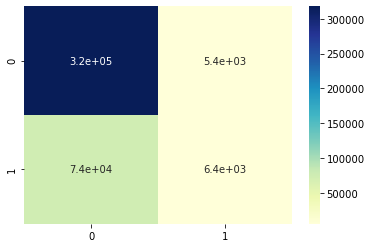

In [89]:
#Visualising Confusion matrix
print("Confusion Matrix on Test Data Plot")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')

In [91]:
fn = [x for x in accept_df.columns if x != "loan_status"]
feature_imp = pd.Series(model.feature_importances_, index= fn).sort_values(ascending=False)
feature_imp

int_rate                    0.066895
dti                         0.064110
tot_cur_bal                 0.059842
revol_bal                   0.059203
emp_title                   0.057995
revol_util                  0.057475
earliest_cr_line            0.056353
installment                 0.055623
annual_inc                  0.053519
last_pymnt_d                0.052385
total_acc                   0.046760
loan_amnt                   0.042720
addr_state                  0.042421
open_acc                    0.039266
grade                       0.032538
fico_range_low              0.029009
fico_range_high             0.028502
emp_length                  0.027207
purpose                     0.019360
mort_acc                    0.019282
term                        0.015798
open_acc_6m                 0.014500
verification_status         0.012828
delinq_2yrs                 0.011667
home_ownership              0.010002
pub_rec                     0.008285
initial_list_status         0.007604
p

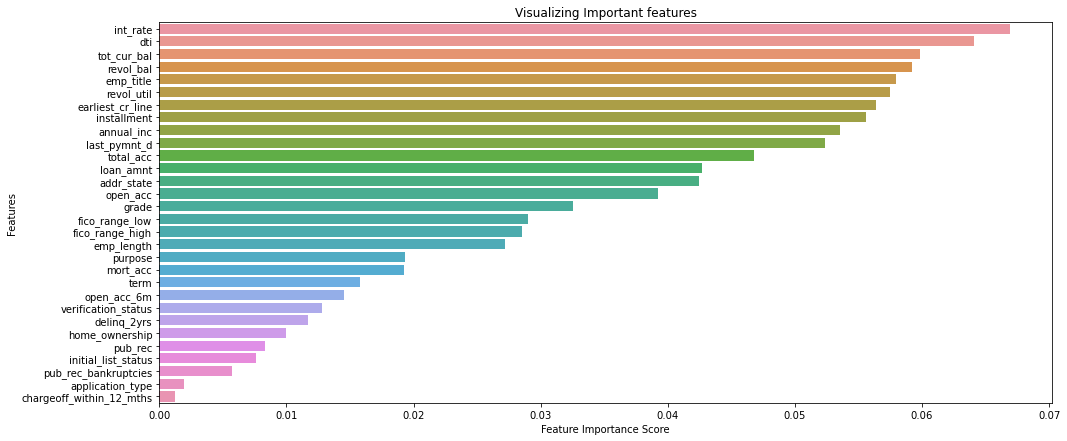

In [92]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.gcf().set_size_inches(16,7)
#plt.show()

In [93]:
#Summary of metrics on Random Forest model
print("Score: ",model.score(X_test, y_test))
print("F1_Score: ",f1_score(y_test, y_pred))
print("Precision: ",precision_score(y_test, y_pred))
print("Recall: ",recall_score(y_test, y_pred))

Score:  0.8032993634676519
F1_Score:  0.1392217029720147
Precision:  0.5438373570520966
Recall:  0.07982890253910621
